# Decision Trees

### Goal: 
- To build a model from the historical data of patients, and their response to different medications.
- To predict the class of an unknown patient or find a proper drugfor a new patient.

### Class:
DecisionTreeClassifer from sklearn.tree

#### Step 1. Import packages

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

#### Step 2. Dataset

##### Features:
Age, Sex, Blood Pressure, Cholesterol, etc.

##### Objection groups:
5 medications: Drug A, Drug B, Drug C, Drug X, Drug Y

[Download dataset here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv)

In [2]:
# read the data
path = "/Users/pc/Desktop/IBM AI Engineer/Machine Learning with Python/"
dataset_name = "drug200.csv"
mydata = pd.read_csv(path + dataset_name)
# size of the data
mydata.shape

(200, 6)

#### Step 3. Data Preprocessing

Use my_data as the Drug.csv data read by pandas:
- X: Feature Matrix (data of my_data)
- y: response vector (target)

##### As some features in the dataset are categorical, such as Sex, BP, or Chol. As Sklearn Decision Trees does not handle categorical varibales. So we will need to convert these features (categorical values) into numerical values using LabekEncoder.

In [3]:
# Feature Matrix
X = mydata[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
print("Before Transform \n", X[0:5])

from sklearn import preprocessing

# Transform categorical variables into numerical variables
# Sex
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
X[:, 1] = le_sex.transform(X[:, 1])

# BP
le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
X[:, 2] = le_BP.transform(X[:, 2])

# Chol
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL', 'HIGH'])
X[:, 3] = le_Chol.transform(X[:, 3])

print("After Transform \n", X[0:5])

Before Transform 
 [[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.114]
 [28 'F' 'NORMAL' 'HIGH' 7.798]
 [61 'F' 'LOW' 'HIGH' 18.043]]
After Transform 
 [[23 0 0 0 25.355]
 [47 1 1 0 13.093]
 [47 1 1 0 10.114]
 [28 0 2 0 7.798]
 [61 0 1 0 18.043]]


In [4]:
# Target varible y
y = mydata['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

#### Step 4. Train and Test sets

- Use train.test split on decision tree (train_test_split from sklearn.cross_validation)
- Test: 30% & Train: 70%

In [5]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

# Shape of the training set
print("Shape of the X training set{}\nShape of the Y training set{}"
      .format(X_trainset.shape, y_trainset.shape))

# Shape of the test set
print("Shape of the X test set{}\nShape of the Y test set{}"
      .format(X_testset.shape, y_testset.shape))


Shape of the X training set(140, 5)
Shape of the Y training set(140,)
Shape of the X test set(60, 5)
Shape of the Y test set(60,)


#### Step 5. Decision Tree Model

create DecisionTreeClassfier, specify criterion = "entropy"

In [6]:
drugTree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
drugTree # show the default parameters


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [7]:
# fit the data with the training feature matrix X_trainset and training response vector y_trainset
drugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Step 6. Prediction

make predictions on the testing daatset and store into a variable called predTree

In [8]:
predTree = drugTree.predict(X_testset)
print("Prediction values:\n", predTree[0:5])
print("Actual values:\n", y_testset[0:5])

Prediction values:
 ['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
Actual values:
 40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


#### Step 7. Evaluation: Accuracy classification score
- Computes subset accuracy
- The set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In [9]:
from sklearn import metrics 
import matplotlib.pyplot as plt
print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_testset, predTree))


DecisionTree's Accuracy:  0.9833333333333333


#### Step 8. Visualization

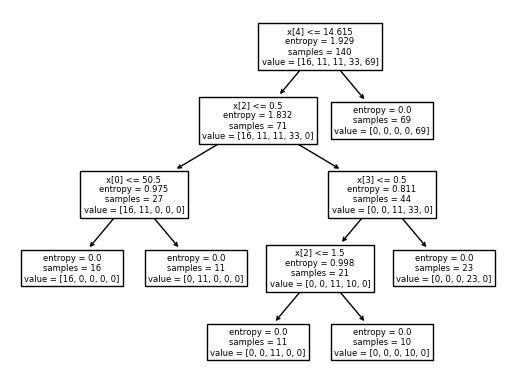

In [10]:
tree.plot_tree(drugTree)
plt.show()

# Application
## Faster Credit Card Fraud Detection using Snap ML

### Objections: 
- Perform basic data preprocessing in Python
- Model a classification task using Scikit-learn and Snap ML Python APIs
- Train SVM (support vector machine) and Decision Tree mdoels using Scikit-learn and Snap ML
- Run inference and assess the quality of the trained models

### binary classification problem
- positive class (1): if it is a fraud
- negative class (0): if it is not a fraud

To train the model to determine whether a case is fraudulent. Step 1. Dataset

### Step 1. Import packages

In [11]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings("ignore")


### Step 2. Dataset
- 492 transactions out of 284,807 are fraudulent (0.172%)
- [Download dataset here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
- Inflate the dataset 10 times to simulate the real case large dataset

In [12]:
path = "/Users/pc/Desktop/IBM AI Engineer/Machine Learning with Python/"
dataset_name = "creditcard.csv"
raw_data = pd.read_csv(path + dataset_name)
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

# display the first rows in the dataset
raw_data.head()

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
n_replicas = 10

# inflate the original dataset
big_raw_data = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis = 0), columns = raw_data.columns)
print("There are " + str(len(big_raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(big_raw_data.columns)) + " variables in the dataset.")

# display first rows in the new dataset
big_raw_data.head()


There are 2848070 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


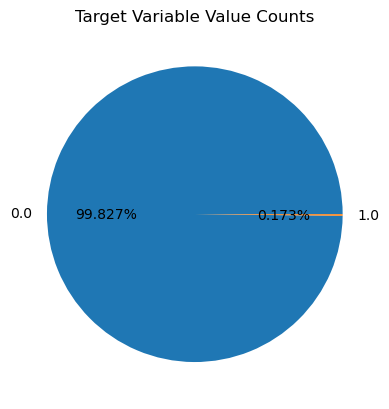

In [14]:
# get the set of distinct classes
# label = 0: the credit card transaction is legal
# label = 1: the credit card transaction is illegal
labels = big_raw_data.Class.unique()

# get the count of each classes
sizes = big_raw_data.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct = "%1.3f%%")
ax.set_title("Target Variable Value Counts")
plt.show()

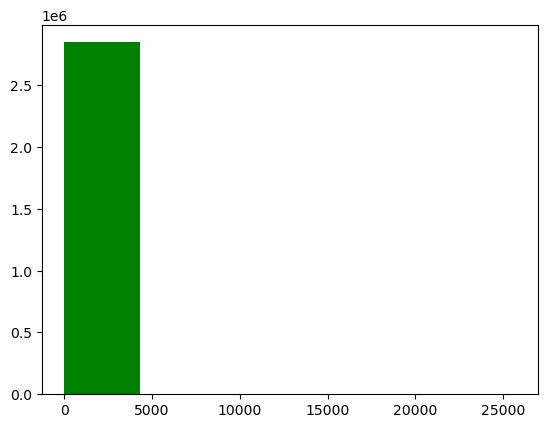

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than 203.0


In [15]:
# histogram to show the distribution of these amounts
plt.hist(big_raw_data.Amount.values, 6, histtype = "bar", facecolor = "g")
plt.show()

print("Minimum amount value is ", np.min(big_raw_data.Amount.values))
print("Maximum amount value is ", np.max(big_raw_data.Amount.values))
print("90% of the transactions have an amount less or equal than", 
      np.percentile(raw_data.Amount.values, 90))



### Step 3. Data Preprocessing

- Scaling / Normalizing: useful for linear models to accelerate the training convergence

In [16]:
# Standardize features: remove the mean and sclaing to unit variance
big_raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(big_raw_data.iloc[:, 1:30])
data_matrix = big_raw_data.values

# X: feature matrix (exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm = "l1")

# print the shape of the features matrix and the labels vector 
print("X.shape = ", X.shape, "y.shape = ", y.shape)


X.shape =  (2848070, 29) y.shape =  (2848070,)


### Step 4. Train / Test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


### Step 5. Decision Tree Classifier model

#### 1. with Scikit-learn

In [18]:
# compute the sample weights to be used as input to the train routine
# so it can consider the class imbalance present
w_train = compute_sample_weight("balanced", y_train)

# import the Decision Tree Classifier Model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# for reproducible output across multiple function cells, set random_state to a given integer vvalue
sklearn_dt = DecisionTreeClassifier(max_depth = 4, random_state = 35)

# Train a Decision Tree Classifier using scikit-learn
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight = w_train)
sklearn_time = time.time() - t0
print("[Scikit-learn] Training time (s): {0:.5f}".format(sklearn_time))

[Scikit-learn] Training time (s): 43.81554


#### 2. with snapml

In [30]:
import snapml
from snapml import DecisionTreeClassifier


w_train = compute_sample_weight("balanced", y_train)

# if use GPU, set the use_gpu parameter to True
# snapml_dt = DecisionTreeClassifer(max_depth = 4, random_state = 45, use_gpu = True)

# if use CPU
# set te n_jobs for reproducible output across multiple function calls, set random_state to a given integer value
snapml_dt = DecisionTreeClassifier(max_depth = 4, random_state = 45, n_jobs = 4)

# train a Decision Tree Classifier model using Snap ML
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight = w_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s): {0:.5f}".format(snapml_time))


ImportError: dlopen(/Users/pc/anaconda3/lib/python3.10/site-packages/snapml/libsnapmlutils_avx2.so, 0x0002): Library not loaded: '/usr/local/opt/libomp/lib/libomp.dylib'
  Referenced from: '/Users/pc/anaconda3/lib/python3.10/site-packages/snapml/libsnapmlutils_avx2.so'
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

### Step 6. Evaluate the Scikit-learn and Snap ML Decision Tree Classifier Models

In [ ]:
# Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

# run inference and compute the probabilities of the test samples 
# to belong to the class of fraudulent transactions
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic 
# Curve (ROC-AUC) score from the predictions
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

# run inference and compute the probabilities of the test samples
# to belong to the class of fraudulent transactions
snapml_pred = snapml_dt.predict_proba(X_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the prediction scores
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)   
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

In [ ]:
# import the linear Support Vector Machine (SVM) model from Scikit-Learn
from sklearn.svm import LinearSVC

# instatiate a scikit-learn SVM model
# to indicate the class imbalance at fit time, set class_weight='balanced'
# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

# train a linear Support Vector Machine model using Scikit-Learn
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

In [ ]:
# import the Support Vector Machine model (SVM) from Snap ML
from snapml import SupportVectorMachine
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred  = snapml_svm.decision_function(X_test)

# import the hinge_loss metric from scikit-learn
from sklearn.metrics import hinge_loss

# evaluate the hinge loss from the predictions
loss_snapml = hinge_loss(y_test, snapml_pred)
print("[Snap ML] Hinge loss:   {0:.3f}".format(loss_snapml))

# evaluate the hinge loss metric from the predictions
loss_sklearn = hinge_loss(y_test, sklearn_pred)
print("[Scikit-Learn] Hinge loss:   {0:.3f}".format(loss_snapml))

# the two models should give the same Hinge lossz
# in contrast to scikit-learn's LinearSVC, Snap ML offers multi-threaded CPU/GPU training of SVMs
# to use the GPU, set the use_gpu parameter to True
# snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, use_gpu=True, fit_intercept=False)

# to set the number of threads used at training time, one needs to set the n_jobs parameter
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)
# print(snapml_svm.get_params())

# train an SVM model using Snap ML
t0 = time.time()
model = snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

In [23]:
# Snap ML vs Scikit-learn train speedup
training_speedup = sklearn_time / snapml_time
print("[SVM] Snap ML vs. Scikit-learn training speedup: {0:.2f}x".format(training_speedup))

# tun inference using the Scikit-learn model
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)

# evaluate accuracy on test set
acc_sklearn = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score: {0:.3f}".format(acc_sklearn))

# run inference using the Snap ML mdoel
# get the confidence scores for the test samples
snapml_pred = snapml_svm.decision_function(X_test)

# evaulate accuracy on test set
acc_snapml = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC score: {0:.3f}".format(acc_snapml))


NameError: name 'snapml_time' is not defined

In [ ]:
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred  = snapml_svm.decision_function(X_test)

# import the hinge_loss metric from scikit-learn
from sklearn.metrics import hinge_loss

# evaluate the hinge loss from the predictions
loss_snapml = hinge_loss(y_test, snapml_pred)
print("[Snap ML] Hinge loss:   {0:.3f}".format(loss_snapml))

# evaluate the hinge loss metric from the predictions
loss_sklearn = hinge_loss(y_test, sklearn_pred)
print("[Scikit-Learn] Hinge loss:   {0:.3f}".format(loss_snapml))

# the two models should give the same Hinge loss